# Create explanatory visuals and data for entropy in the N1904-TF

## Table of content (ToC)<a class="anchor" id="TOC"></a>

* <a href="#bullet1">1 - Introduction</a>
* <a href="#bullet2">2 - Load N1904-TF package with the N1904addons</a>
* <a href="#bullet3">3 - Creating the visualizing</a>    
  * <a href="#bullet3x1">3.1 - Stand alone examples</a>
  * <a href="#bullet3x2">3.2 - N1904-TF words with the highest entropy value</a>
  * <a href="#bullet3x3">3.3 - N1904-TF words with an entropy of 1.0</a>
  * <a href="#bullet3x4">3.4 - N1904-TF words with an entropy of 0.0</a>
  * <a href="#bullet3x5">3.5 - Creating the demonstration set</a>
  * <a href="#bullet3x6">3.6 - Theoretical maximum entropy</a>
* <a href="#bullet4">4 - Attribution and footnotes</a>
* <a href="#bullet5">5 - Required libraries</a>
* <a href="#bullet6">6 - Notebook version</a>

# 1 - Introduction <a class="anchor" id="bullet1"></a>
##### [Back to ToC](#TOC)

This notebook is intended to create a few examples that clearly can demonstrate the concept entropy in the contect of N1904-TF.

# 2 - Load N1904-TF package with the N1904addons <a class="anchor" id="bullet2"></a>

Since we want to investigate entropy, we also need the N1904addons to be loaded.

In [1]:
# Load the autoreload extension to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

In [129]:
from tf.fabric import Fabric
from tf.app import use

In [130]:
# load the N1904 app and data
N1904 = use ("CenterBLC/N1904", version="1.0.0", mod="tonyjurg/N1904addons/tf/", silence="terse", hoist=globals() )

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

# 3 - Creating the visualizing <a class="anchor" id="bullet3"></a>
##### [Back to ToC](#TOC)


## 3.1 - Stand alone examples <a class="anchor" id="bullet3x1"></a>

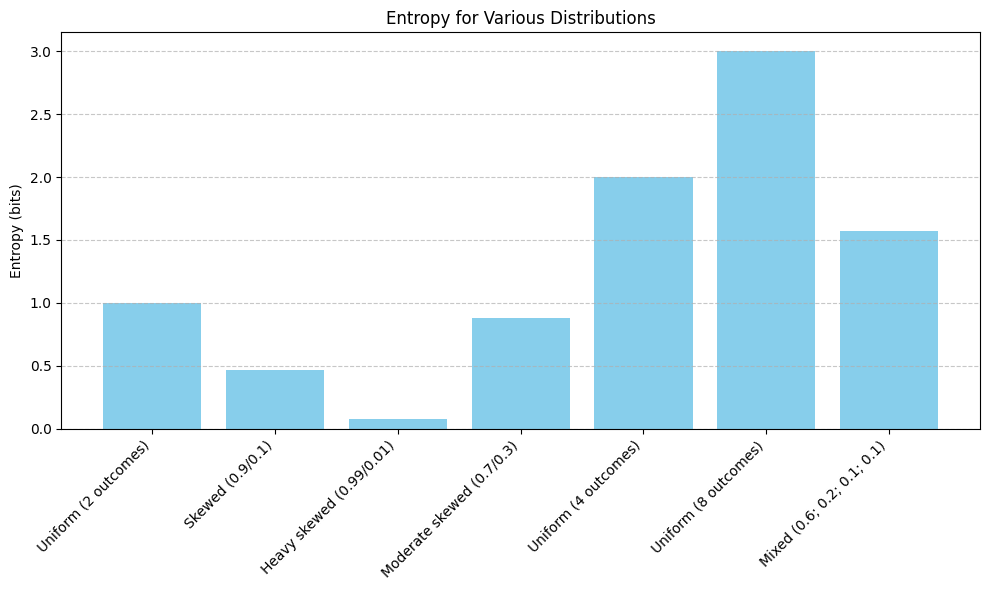

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Define entropy function
def compute_entropy(prob_dist):
    return -sum(p * np.log2(p) for p in prob_dist if p > 0)

# Example distributions
distributions = {
    "Uniform (2 outcomes)": [0.5, 0.5],
    "Skewed (0.9/0.1)": [0.9, 0.1],
    "Heavy skewed (0.99/0.01)": [0.99, 0.01],
    "Moderate skewed (0.7/0.3)": [0.7, 0.3],
    "Uniform (4 outcomes)": [0.25, 0.25, 0.25, 0.25],
    "Uniform (8 outcomes)": [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] ,
    "Mixed (0.6; 0.2; 0.1; 0.1)": [0.6, 0.2, 0.1, 0.1],
}

# Compute entropy values
entropy_values = [compute_entropy(p) for p in distributions.values()]

# Plot entropy for predefined distributions
plt.figure(figsize=(10, 6))
plt.bar(distributions.keys(), entropy_values, color='skyblue')
plt.ylabel('Entropy (bits)')
plt.xticks(rotation=45, ha='right')
plt.title('Entropy for Various Distributions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()






## 3.2 - N1904-TF words with the highest entropy value <a class="anchor" id="bullet3x2"></a>

Now we will get a list of words with a very high entropy and examine its probability distribution.

In [132]:
# First load the probability function that was created and stored as pickle file in notebook 'create_entropy_type2pf_features.ipynb'
import pickle

with open('P_f_given_datatype.pkl', 'rb') as f:
    P_f_given_datatype = pickle.load(f)


In [133]:
# The TF query part:

# note: be very carefull with regexp! text_entr~2.58496 interprets the . as any digit, leading to false results
# Hence I need to escape it with \ *AND* also add the 'r' in front of the query template

entrHighQuery=r"""
word text_entr~2\.58496
"""
entrHighResults = N1904.search(entrHighQuery)

# The post processing part:
from collections import Counter
textFrequency = Counter()

for wordNode in entrHighResults:
    text=F.text.v(wordNode[0])
    textFrequency[text] += 1

# now textFrequency holds the total counts per text form
print ('word       freq          distribution')
for text, freq in textFrequency.most_common(10):
    dist=P_f_given_datatype["text"][text]
    print(f"{text:10} {freq:3}    {dist} ")

  0.10s 6 results
word       freq          distribution
ἀγαθῶν       6    {'Adv': 0.16666666666666666, 'Cmpl': 0.16666666666666666, 'Objc': 0.16666666666666666, 'PreC': 0.16666666666666666, 'Subj': 0.16666666666666666, 'Unkn': 0.16666666666666666} 


Checking the calculation of entropy

In [134]:
import math

def compute_entropy(probs):
    ent = 0.0
    for p in probs.values():
        if p > 0:
            ent -= p * math.log2(p)
    return ent

# stick in the probs found for ἀγαθῶν
probs = {'Adv': 0.16666666666666666, 'Cmpl': 0.16666666666666666, 'Objc': 0.16666666666666666, 'PreC': 0.16666666666666666, 'Subj': 0.16666666666666666, 'Unkn': 0.16666666666666666}
ent = compute_entropy(probs)
print(ent)

2.584962500721156


## 3.3 - N1904-TF words with an entropy of 1.0 <a class="anchor" id="bullet3x3"></a>

From the definition it follows that probabilities should distributed equaly over two outcomes.

In [135]:
# The TF query part:
entrEqualQuery="""
word text_entr=1.0
"""
entrEqualResults = N1904.search(entrEqualQuery)

# The post processing part:
from collections import Counter
textFrequency = Counter()

for wordNode in entrEqualResults:
    text=F.text.v(wordNode[0])
    textFrequency[text] += 1

# now textFrequency holds the total counts per text form
print ('word       freq   distribution')
for text, freq in textFrequency.most_common(10):
    dist=P_f_given_datatype["text"][text]
    print(f"{text:10} {freq:3}   {dist} ")

  0.09s 1454 results
word       freq   distribution
συνείδησιν  16   {'Cmpl': 0.5, 'Objc': 0.5} 
ἀποστόλους  14   {'Cmpl': 0.5, 'Objc': 0.5} 
ὅθεν        12   {'Adv': 0.5, 'Unkn': 0.5} 
γενήσεται   10   {'PreC': 0.5, 'Pred': 0.5} 
ἀμπελῶνος   10   {'Cmpl': 0.5, 'Subj': 0.5} 
ἀσθενείας    8   {'Cmpl': 0.5, 'Objc': 0.5} 
μέν          8   {'Objc': 0.5, 'Unkn': 0.5} 
χάρισμα      8   {'Objc': 0.5, 'Subj': 0.5} 
πονηρὸν      6   {'Objc': 0.5, 'Subj': 0.5} 
χοίρων       6   {'Cmpl': 0.5, 'Subj': 0.5} 


Verify entropy

In [136]:
# stick in the probs found for χάρισμα
probs = {'Cmpl': 0.5, 'Objc': 0.5}
ent = compute_entropy(probs)
print(ent)

1.0


## 3.4 - N1904-TF words with an entropy of 0.0 <a class="anchor" id="bullet3x4"></a>

In [137]:
# The TF query part:
entrEqualQuery="""
word text_entr=0.0
"""
entrEqualResults = N1904.search(entrEqualQuery)

# The post processing part:
from collections import Counter
textFrequency = Counter()

for wordNode in entrEqualResults:
    text=F.text.v(wordNode[0])
    textFrequency[text] += 1

# now textFrequency holds the total counts per text form
print ('word       freq   distribution')
for text, freq in textFrequency.most_common(10):
    dist=P_f_given_datatype["text"][text]
    print(f"{text:10} {freq:3}   {dist} ")

  0.13s 53767 results
word       freq   distribution
καὶ        8545   {'Conj': 1.0} 
δὲ         2620   {'Conj': 1.0} 
ὅτι        1281   {'Conj': 1.0} 
γὰρ        921   {'Conj': 1.0} 
ἵνα        666   {'Conj': 1.0} 
εἶπεν      570   {'Pred': 1.0} 
οὖν        496   {'Conj': 1.0} 
ἀλλὰ       411   {'Conj': 1.0} 
Καὶ        397   {'Conj': 1.0} 
λέγει      331   {'Pred': 1.0} 


In [138]:
# using conjuctions like καὶ would be faul play, as I have 'hardcoded' these always map to the class'Conj' 
# so, I stick in the probs found for εἶπεν
probs = {'Pred': 1.0}
ent = compute_entropy(probs)
print(ent)

0.0


## 3.5 - Creating the demonstration set <a class="anchor" id="bullet3x5"></a>

Using the results from the previous sections I can now createa my 3 actual examples using actual N1904-TF data:

word |  entropy | distribution
---|---|---
εἶπεν | 0.0 | 'Pred': 1.0
χάρισμα | 1.0 | 'Objc': 0.5, 'Subj': 0.5
ἀγαθῶν | 2.58496 | 'Adv': 0.1666, 'Cmpl': 0.1666, 'Objc': 0.1666, 'PreC': 0.1666, 'Subj': 0.1666, 'Unkn': 0.16666



## 3.6 - Theoretical maximum entropy <a class="anchor" id="bullet3x6"></a>

In the current setup, there are 11 phrase function catagories defined:
```txt
                 Frequency
phrase_function           
Cmpl                 35442
Pred                 25138
Subj                 21567
Objc                 19371
Conj                 16316
PreC                  9595
Adv                   5367
Unkn                  2076
Intj                  1470
Aux                   1136
Appo                   301
Total               137779
```

Just as the earlier created plot already suggest, it can be proven that the theoretical maximum Shannon entropy is encountered when all outcomes are equally likely.

<details><summary><b>Detailed mathematic description</b></summary>
If a word can belong to 11 categories (so $n=11$), then its entropy $H$ in bits is given by:

$$
H = -\sum_{i=1}^{n} p_i \log_2(p_i)
$$

If all $p_i = \frac{1}{n}$, so probability of membership of each catagory is equally distributed, then:

$$
H = -n \cdot \frac{1}{n} \cdot \log_2\left(\frac{1}{n}\right) = \log_2(n)
$$

If we apply this to our dataset where $n = 11$:

$$
H = \log_2(11) \approx 3.459
$$

</details>
<br>
Since in our dataset (where - at least in theory - a word can belong to any of 11 phrase function categories) the theoretical maximum entropy ($H$) is:

$$
{H = \log_2(11) \approx 3.459 \text{ bits}}
$$



# 4 - Attribution and footnotes <a class="anchor" id="bullet4"></a>
##### [Back to ToC](#TOC)

Greek base text: Nestle1904 Greek New Testament, edited by Eberhard Nestle, published in 1904 by the British and Foreign Bible Society. Transcription by [Diego Santos](https://sites.google.com/site/nestle1904/home). Public domain.


# 5 - Required libraries<a class="anchor" id="bullet5"></a>
##### [Back to ToC](#TOC)

Since the scripts in this notebook utilize Text-Fabric, [it requires currently (Apr 2025) Python >=3.9.0](https://pypi.org/project/text-fabric) together with the following libraries installed in the environment:

    tqdm.std
    math
    re
    pandas
    pickle
    
You can install any missing library from within Jupyter Notebook using either`pip` or `pip3`.

# 6 - Notebook version<a class="anchor" id="bullet6"></a>
##### [Back to ToC](#TOC)

<div style="float: left;">
  <table>
    <tr>
      <td><strong>Author</strong></td>
      <td>Tony Jurg</td>
    </tr>
    <tr>
      <td><strong>Version</strong></td>
      <td>1.1</td>
    </tr>
    <tr>
      <td><strong>Date</strong></td>
      <td>23 May 2025</td>
    </tr>
  </table>
</div>